### 0. 라이브러리 설치 및 API KEY 생성하기

In [ ]:
# !pip install openai

- OpenAI API KEY : https://platform.openai.com/account/api-keys

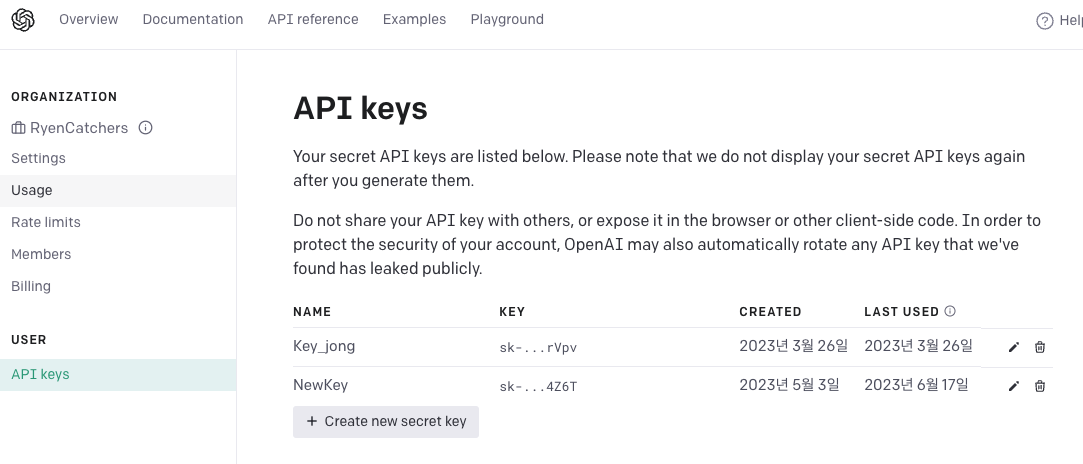

In [ ]:
import openai
openai.api_key = "your key"

### 1. 프롬프트 살펴보기



```
messages= {[“role” : “system”,
		    “content” : ~~~ ,
		     “role” : “user”,
		     “content” : prompt , … ]}
```



In [ ]:
# 기사링크 : https://n.news.naver.com/mnews/article/001/0014045036?rc=N&ntype=RANKING

text = f"""IAEA는 해양 방류 방침을 정한 일본의 요청을 받고 2021년 7월 11개국 전문가들이 참여하는 태스크포스(TF)를 구성, 그동안 부문별 중간 보고서를 냈으며, 이날 포괄적인 평가를 담은 종합 보고서를 발표했다.
그는 이와 관련해 "일본 정부가 결정했고 IAEA가 검증을 했다"고 설명했다.
IAEA는 그로시 사무총장의 기자회견 시점과 거의 동시에 보고서 내용을 소개하는 보도자료를 내고 "도쿄전력이 계획하고 평가한 바와 같이 오염수를 통제하고 점진적으로 바다에 방류할 경우 인체와 환경에 미치는 방사능 영향이 미미할 것"이라고 설명했다.
그로시 사무총장은 이 자료를 통해서도 "오늘 발표한 보고서는 우리의 검토 과정에서 중요한 이정표이지만 우리의 임무는 이제 시작에 불과하다"면서 "모든 이해 관계자가 검증된 사실과 과학에 입각해 방류 절차에 대해 이해할 수 있도록 국제사회에 투명성을 제공할 것"이라고 밝혔다.
"""

prompt = f"""
다음의 ```로 감싸진 뉴스본문을 3가지 요점으로 요약해줘

```{text}```
"""

print(prompt)

### 2. 응답 생성하기(뉴스요약)

In [ ]:
response = openai.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = [
        {"role":"system",
         "content":"너는 뉴스의 본문을 요약해주는 기자야. 글쓰기에 능하고 한국말을 잘해."
        },
        {"role":"user",
         "content":prompt
         },
    ],
    temperature = 0.5
)

In [ ]:
print(response.choices[0].message['content'])

### 3. DALL-E 사용하기

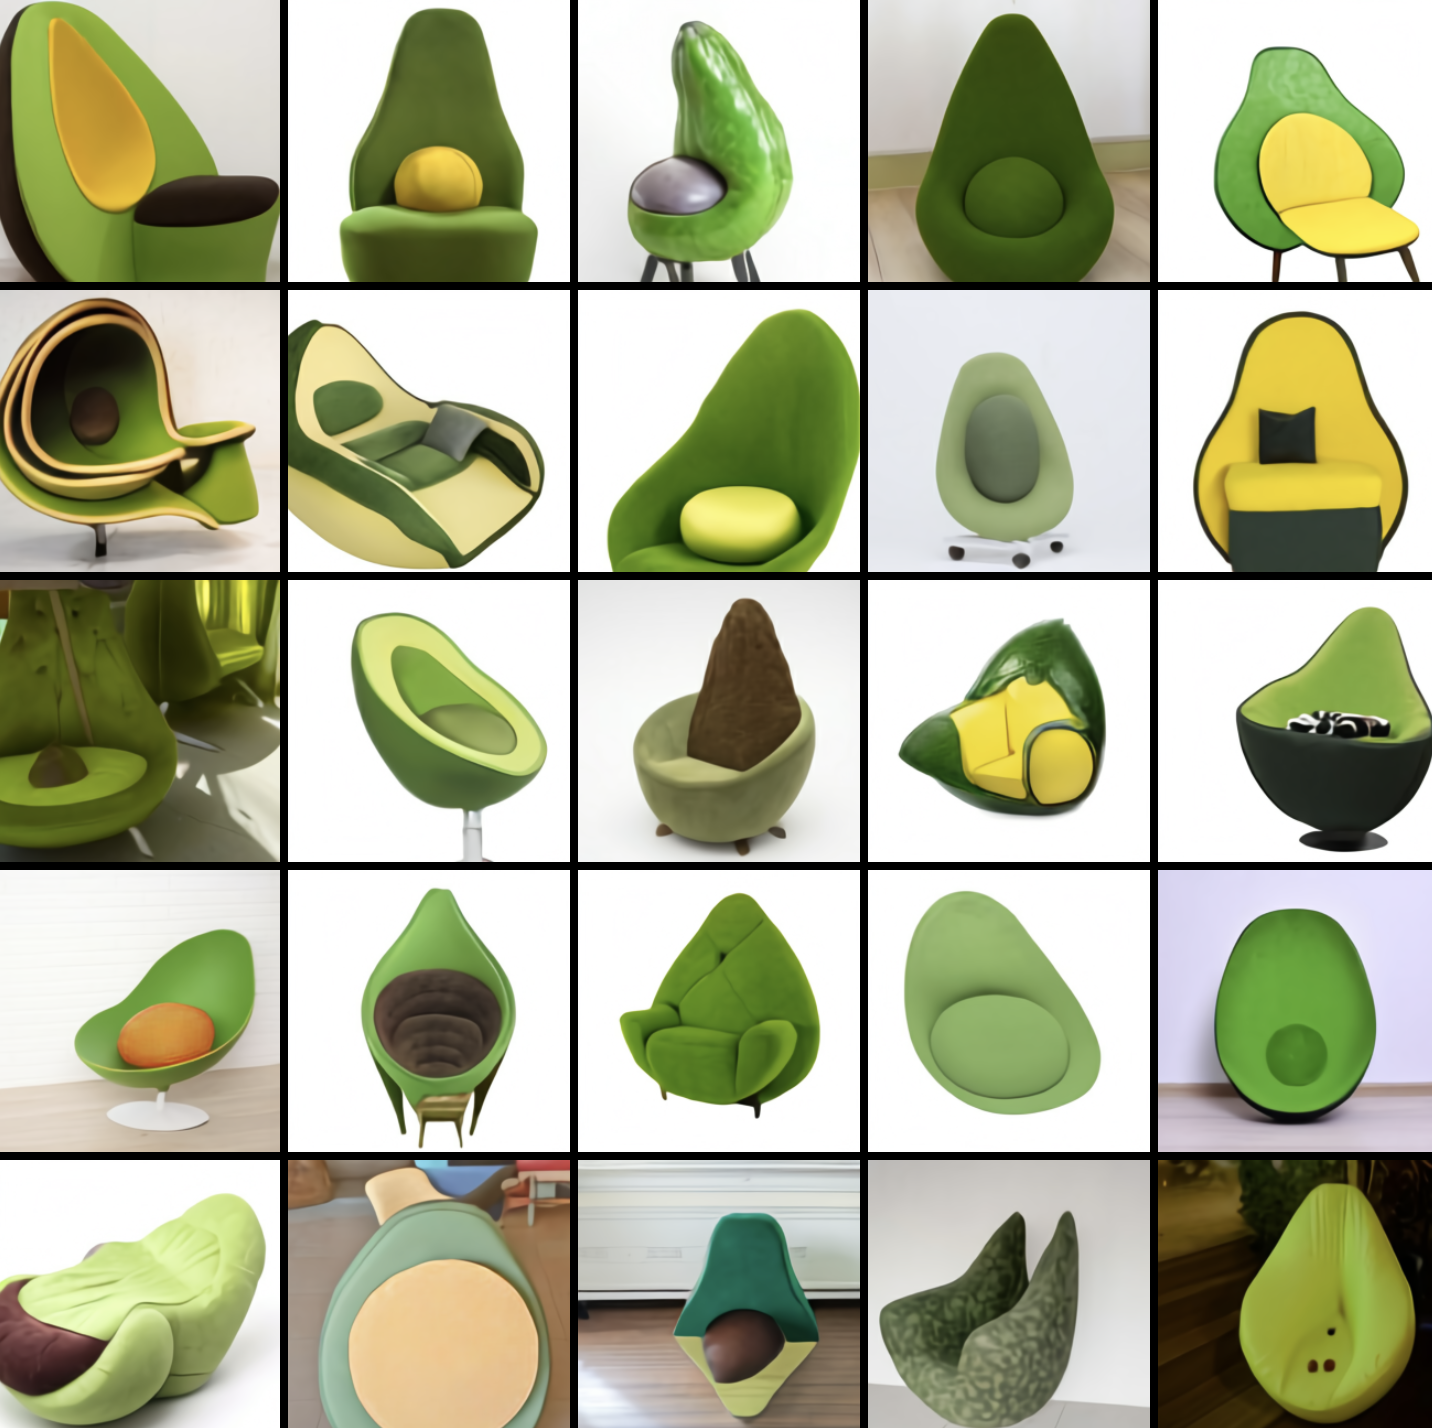

"green apple and yellow mountain"을 가지고 DALL-E에게 프롬프트를 생성해 보겠습니다.

1. 화려한 초록색 사과가 높은 산과 함께 있는 풍경을 그려주세요.
2. 초록색 사과가 노란색 산과 어우러진 자연의 아름다움을 표현해주세요.
3. 노란색 산을 배경으로 초록색 사과가 농장에서 수확되는 장면을 그려주세요.
4. 초록색 사과와 노란색 산이 만나는 자연의 만남을 담은 그림을 그려주세요.
5. 노란색 산이 멋진 배경이 되어 초록색 사과가 푸른 땅에서 자란 다양한 모습을 그려주세요.

이러한 프롬프트를 사용하여 DALL-E에게 다양한 그림을 생성할 수 있을 것입니다.

In [ ]:
#ChatGPT로 dalle 프롬프트 생성
# img_fit = "green apple and yellow mountain"

# chat_response = openai.ChatCompletion.create(
#     model = "gpt-3.5-turbo",
#     messages = [
#         {"role":"system",
#          "content":"너는 인공지능 모델은 DALL-E의 프롬프트를 생성해"
#         },
#         {"role":"user",
#          "content":f"{img_fit}의 내용을 가진 DALL-E의 프롬프트를 생성해"
#          },
#     ],
#     temperature = 1.0
# )

# print(chat_response.choices[0].message['content'])

prompt_message = "노란색 산을 배경으로 초록색 사과가 농장에서 수확되는 장면을 그려주세요."


openai.Image.create(
        prompt=prompt_message,
        size ="1024x1024")

### bye

In [ ]:
import requests
from bs4 import BeautifulSoup
import PIL.Image

def get_image_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    image_element = soup.find('img')
    image_url = image_element['src']

    image_file = requests.get(image_url).content
    image = PIL.Image.open(io.BytesIO(image_file))
    return image

In [ ]:
def main():
    dalle_response = dalle()
    url = dalle_response["data"][0]["url"]
    image = get_image_from_url(url)
    image.show()
    return image

In [ ]:
if __name__ == '__main__':
    image = main()

In [ ]:
import openai

prompt_message = "a cute green avocado chair"

def dalle():
    dalle_response = openai.Image.create(
        prompt=prompt_message,
        size ="1024x1024")
    return dalle_response